# Shap!

In [ ]:
# Import necessary libraries for the whole notebook
import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
shap.initjs()       # needed for the force plot

# Load and prepare the Iris dataset (binary classification)
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

variety_to_exclude = 0   # We need to explude one of the three varieties

# Keep only two classes
X = X[y != variety_to_exclude]
y = y[y != variety_to_exclude]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize and train models
lr_raw = LogisticRegression(max_iter=100, random_state=42).fit(X_train, y_train)

# Check performance
print("Raw Data - Train accuracy:", lr_raw.score(X_train, y_train))
print("Raw Data - Test accuracy:", lr_raw.score(X_test, y_test))


Raw Data - Train accuracy: 0.9714285714285714
Raw Data - Test accuracy: 0.9333333333333333


### Not that we have a good model, we can explore the predictions!

In [3]:
# SHAP explainers for both models
explainer_lr_raw = shap.LinearExplainer(lr_raw, X_train, feature_names=feature_names)

# compute SHAP values
shap_values_explanation = explainer_lr_raw(X_test)

## Barplot. Global explanation
### Bar plot is a powerful tool to see the 

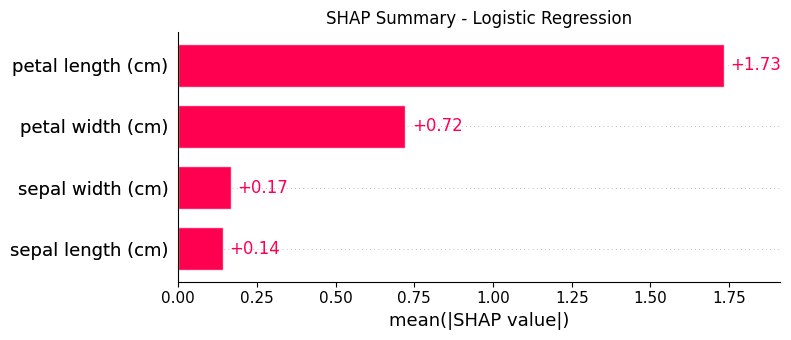

In [4]:
# Raw data summary plot
plt.figure()
# compute SHAP values
shap.plots.bar(shap_values_explanation, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()


# Beeswarm
### This plot is good for analazing how the output of the model behaives with respect of the change of each feature value
### The downside of this plot is that we don't know how the features were connected in the same sample. 

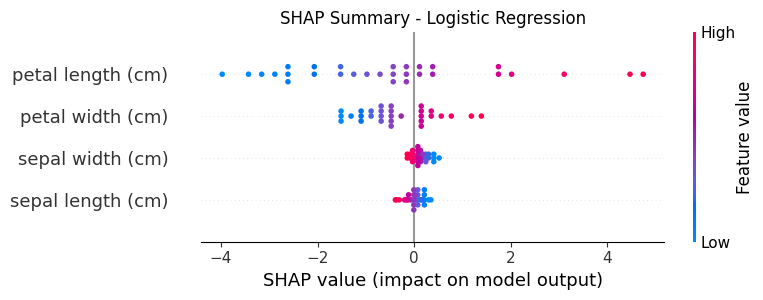

In [5]:
# Raw data summary plot
plt.figure()
shap.plots.beeswarm(shap_values_explanation, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()


## Force plot
In the force plot, we can see for each sample (in the x axis), how the feature values pushed the model.
This is an interactive plot, if you put your cursos on a sample, the value for all the features will appear.

This plot is a intermediate between the global analysis and the local.

In [6]:
shap.force_plot(
    shap_values_explanation, show=False
)


# Local explanation

## Waterfall plot

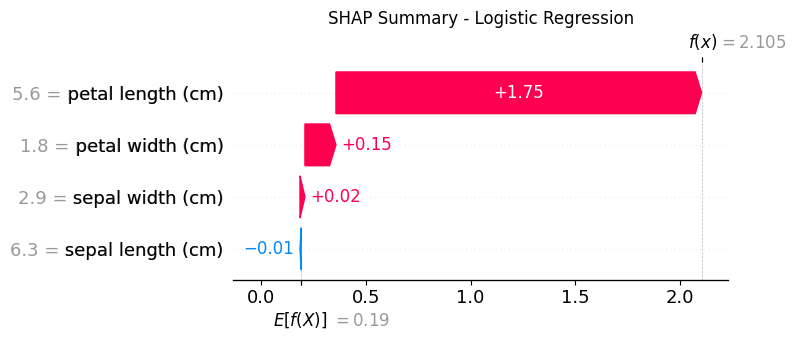

In [7]:
# Raw data summary plot
# compute SHAP values
shap.plots.waterfall(shap_values_explanation[1], show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()

# How to read a Waterfall plot?

## Key Components of the Plot
1. Base Value **(E[f(X)]):**  The average prediction of the model across all training data. This is the starting point before considering feature contributions.

2. Final Prediction **(f(x)):** The model's output for this specific instance. 

3. Feature Contributions **Arrows:** Each row shows how a feature pushes the prediction up or down from the base value.

Positive SHAP value ($\color{red}{\text{Red}}$→) → Increases the prediction.

Negative SHAP value (← $\color{blue}{\text{Blue}}$) → Decreases the prediction.

It is important to know which class was set as our positive

4. **Feature values** (Value right in $\color{gray}{\text{gray}}$ next to the feature name)

As this explanation is *local*, meaning that we are exploring how the model arrived to the final prediction for a given sample, we can see what was the value for each feature.

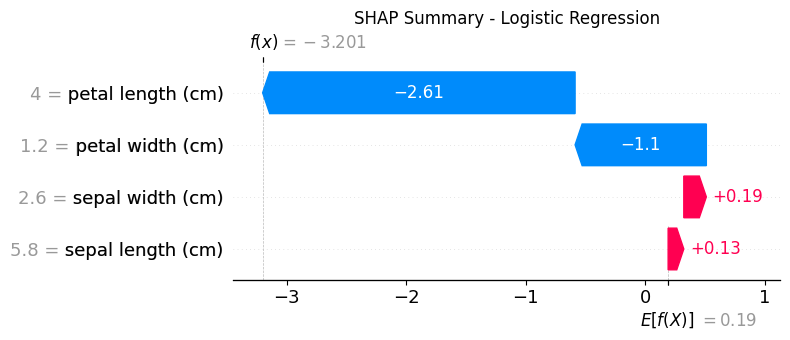

In [8]:
# Raw data summary plot
plt.figure()
# compute SHAP values
shap.plots.waterfall(shap_values_explanation[23], show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()

# But wait, we forgot to scale!

Features are in different scale, so for logistic regression this is indeed important. Let's check how things change with Standarization.

### Before you ran the code, take a minute to think how the standarization will affect (or not), the shap values.


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
lr_srd = LogisticRegression(max_iter=100, random_state=42).fit(X_train_scaled, y_train)

# Check performance
print("Raw Data - Train accuracy:", lr_srd.score(X_train_scaled, y_train))
print("Raw Data - Test accuracy:", lr_srd.score(X_test_scaled, y_test))

# SHAP explainers for both models
explainer_lr_srd = shap.LinearExplainer(lr_srd, X_train_scaled, feature_names=feature_names)

# compute SHAP values
shap_values_explanation = explainer_lr_srd(X_test_scaled)

Raw Data - Train accuracy: 0.9857142857142858
Raw Data - Test accuracy: 0.9


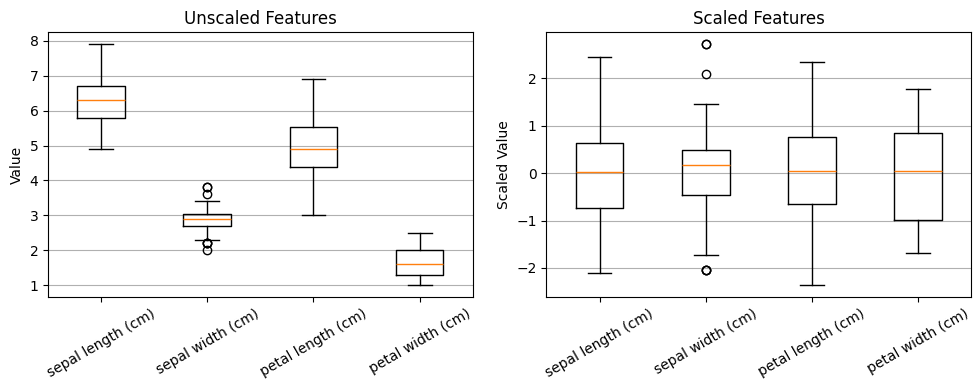

In [10]:
# Boxplot of unscaled features
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(X, tick_labels=feature_names)
plt.title("Unscaled Features")
plt.ylabel("Value")
plt.xticks(rotation=30)
plt.grid(axis="y")

# Boxplot of scaled features
plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled, tick_labels=feature_names)
plt.title("Scaled Features")
plt.ylabel("Scaled Value")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Let's evaluate the model globally

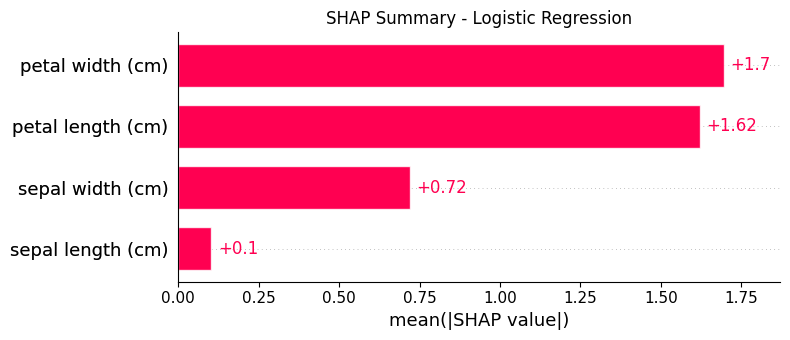

In [11]:
# Raw data summary plot
plt.figure()
shap.plots.bar(shap_values_explanation, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()

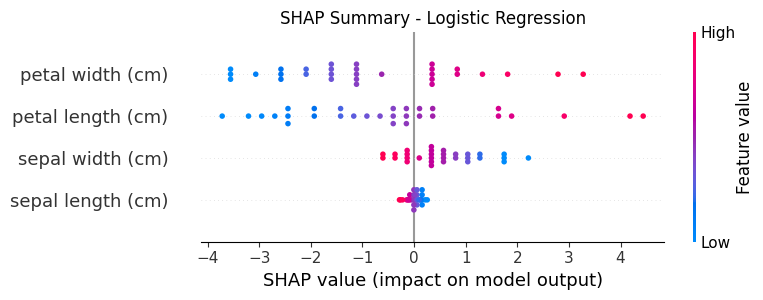

In [12]:
# Raw data summary plot
plt.figure()
shap.plots.beeswarm(shap_values_explanation, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()


## What did you notice?
### The order of the most important feature changed!

## Local explanation

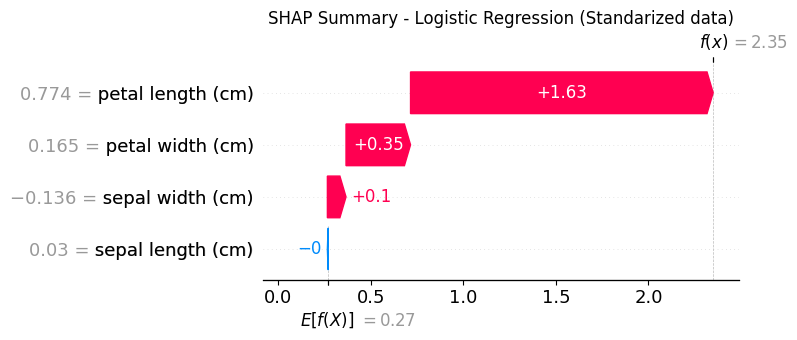

In [13]:
# Raw data summary plot
# compute SHAP values
shap.plots.waterfall(shap_values_explanation[1], show=False)
plt.title("SHAP Summary - Logistic Regression (Standarized data)")
plt.tight_layout()
plt.show()

## Ops! 
### We have the old feature names, but now the units don't make sense anymore!

Rename the features and create the plot as homework!

# ToDO:
1. Enter to the shap [API](https://shap.readthedocs.io/en/latest/api.html#plots) and check other cool ways to plot the models shap values!